<a href="https://colab.research.google.com/github/datalifelab/corso-open-notebook-science/blob/master/colaboratory_file_di_partenza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/datalifelab/corso-open-notebook-science/blob/master/colaboratory_file_di_partenza.ipynb)

In [2]:
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/marradi.py
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/tools.py
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/prepare_vm.py
#!pip install --upgrade numpy
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
import pandas as pd

from prepare_vm import *

--2019-10-09 07:14:18--  https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/marradi.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7663 (7.5K) [text/plain]
Saving to: ‘marradi.py.1’

marradi.py.1        100%[===================>]   7.48K  --.-KB/s    in 0s      

2019-10-09 07:14:18 (74.6 MB/s) - ‘marradi.py.1’ saved [7663/7663]

--2019-10-09 07:14:21--  https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/tools.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4317 (4.2K) [text

In [0]:
##### SOLO SU COLABORATORY E PER LAVORARE CON GOOGLE SPREADSHEET #####
#Effettuo le librerie che mi autorizzano ad accedere ai file di google drive 
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

#richiedo le credenziali: apre delle istruzioni e link da seguire per completare
#la procedura
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [13]:
help(download_gspread)

Help on function download_gspread in module tools:

download_gspread(file_name, sheet_name='Foglio1', key=False, format='wide', virgola_italiano=False, gc=None)
    questa funzione, dato il nome del file di google spreadsheet
    e dello specifico foglio di calcolo (opzionale) di google
    restituisce un dataframe di pandas
    file_name: str 
    sheet_name: str
    key: boolean
    format: ["wide", "long", None]



In [28]:
#scarico i dati di valutazione del questionario
# con nome del file
#questionario = download_gspread("Libro Codice Paola", sheet_name='Paola', gc = gc)
# oppure con la chiave che si trova nelle opzioni di condivisione
key = "1XYqyc9Nv0dVg-LUIPF7cKCvi4ySDHjjxWuBgpwxVu3M" 
foglio = "Risposte del modulo 1"
questionario = download_gspread("1XYqyc9Nv0dVg-LUIPF7cKCvi4ySDHjjxWuBgpwxVu3M", key=True, sheet_name="Risposte del modulo 1", gc = gc)
questionario.head(3)


0 Informazioni cronologiche  ...  U. Vi è la possibilità di godere dello spazio gratuitamente
1       25/09/2019 16.38.02  ...                                                NaN          
2       25/09/2019 16.38.30  ...                                                NaN          
3       25/09/2019 16.38.40  ...                                                NaN          

[3 rows x 34 columns]

In [29]:
questionario.columns.tolist()

['Informazioni cronologiche',
 'A. Data di nascita',
 'A. Genere ',
 'A. Esiste una buona connessione tra lo spazio e gli edifici adiacenti? (assenza di barriere naturali o artificiali, chiusura dello spazio)',
 'A. Le persone possono facilmente raggiungere a piedi il luogo?',
 'A. Lo spazio funziona bene anche per le persone con bisogni speciali?',
 'A. Le strade, i percorsi e la segnaletica guidano le persone attraverso lo spazio in modo lineare verso le loro destinazioni?',
 'A. Le persone possono utilizzare una varietà di opzioni di trasporto - treno di autobus, auto, biciclette, ecc. - per raggiungere il luogo?',
 'A. Il trasporto pubblico e green per raggiungere il luogo è ben strutturato?  ',
 'A. Le fermate del trasporto pubblico sono convenientemente situate vicino a destinazioni come biblioteche, uffici postali, ingressi ai parchi, ecc.?',
 'C. La prima impressione recandosi nel posto è positiva?',
 'C. Ci sono abbastanza posti dove sedersi? ',
 'C. Senti un senso di apparten

In [30]:
#questa funzione ci da un overview di tutte le variabili del questionario per una successiva analisi
pandas_profiling.ProfileReport(questionario)

In [31]:
help(download_gspread)

Help on function download_gspread in module tools:

download_gspread(file_name, sheet_name='Foglio1', key=False, format='wide', virgola_italiano=False, gc=None)
    questa funzione, dato il nome del file di google spreadsheet
    e dello specifico foglio di calcolo (opzionale) di google
    restituisce un dataframe di pandas
    file_name: str 
    sheet_name: str
    key: boolean
    format: ["wide", "long", None]



In [32]:
help(dist_frequenza)

Help on function dist_frequenza in module marradi:

dist_frequenza(matrice, colonna, save=False, tipo='categoriale', lista_ordinale=False)
    matrice: passare un dataframe di pandas
    colonna: indicare la colonna su cui effettuare la distribuzione di frequenza
    save: [False oppure nome del file] scegli se salvare o meno la tabella in excel
    tipo: 
        "categoriale": classi non ordinate
        "ordinale": classi ordinate
        "cardinale": valori numerici
    lista_ordinale: una lista di valori attraverso il cui ordinare il risultato del tipo ordinale



In [33]:
dist_frequenza(questionario, 'A. Genere ')

Frequenze  Percentuale
Donna         9.0        81.82
Uomo          2.0        18.18
Totale       11.0       100.00

In [23]:
help(plot_dist_frequenza)

Help on function plot_dist_frequenza in module marradi:

plot_dist_frequenza(distribuzione, tipo='categoriale', Y='Percentuale', x_label='Valori', y_label='Percentuale', figsize=(12, 8), missing=None)
    distribuzione: inserire risultato della funzione dist_frequenza
    tipo: 
        "categoriale": classi non ordinate
        "ordinale": classi ordinate
        "cardinale": valori numerici
    x_label: etichetta asse x
    y_label: etichetta_asse y



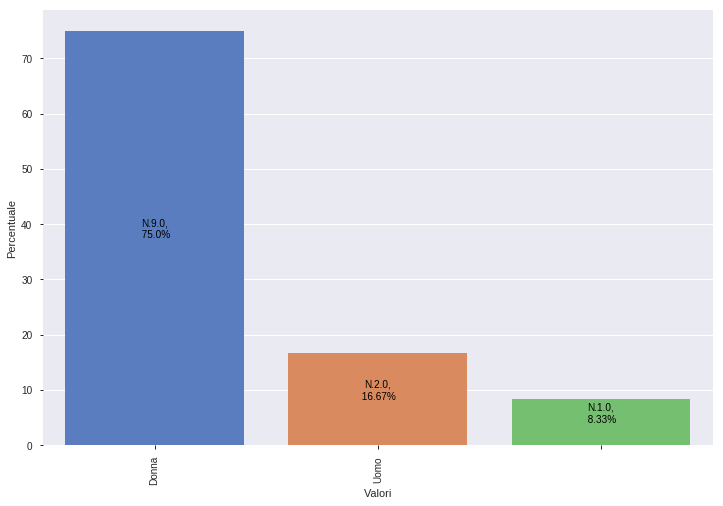

In [25]:
plot_dist_frequenza(dist_frequenza(questionario, 'A. Genere '))

In [26]:
help(tabella_di_contingenza)

Help on function tabella_di_contingenza in module marradi:

tabella_di_contingenza(dataframe, colonna_A, colonna_B, ordine_A=False, ordine_B=False, informativo=False, norm_axis=False)
    dataframe: inserire la tabella su cui si vuole fare la tabulazione incrociata
    colonna_A: inserire la stringa di testo che rappresenta l'intestazione della singola colonna
    colonna_B: inserire la stringa di testo che rappresenta l'intestazione della singola colonna
    ordine_A: inserire una lista di valori rappresentativi dell'ordine delle categorie della colonna A
    ordine_B: inserire una lista di valori rappresentativi dell'ordine delle categorie della colonna B
    iformativo: True, permette di avere in una stessa tabella frequenze, frequenze attese e scarti.



In [34]:
tabella_di_contingenza(questionario, 'A. Genere ', 'A. Data di nascita')

A. Data di nascita  1993.0  1994.0  1995.0  1996.0  All
A. Genere                                              
Donna                    1       4       3       1    9
Uomo                     0       1       0       1    2
All                      1       5       3       2   11

## [Grafici Seaborn](https://seaborn.pydata.org/examples/index.html)

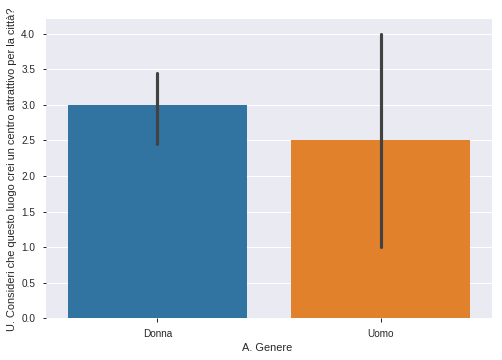

In [45]:
#https://seaborn.pydata.org/examples/index.html
ax = sns.barplot(y='U. Consideri che questo luogo crei un centro attrattivo per la città?', x='A. Genere ', data=questionario)

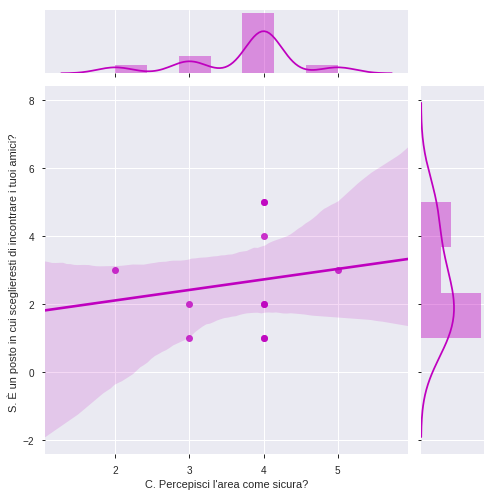

In [47]:
g = sns.jointplot(x = "C. Percepisci l'area come sicura?", y = 'S. È un posto in cui sceglieresti di incontrare i tuoi amici? ', data=questionario, kind="reg",
                   color="m", height=7)